In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now downloading the dataset

In [ ]:
!wget https://cocl.us/concrete_data

--2020-07-05 10:12:03--  https://cocl.us/concrete_data
Resolving cocl.us (cocl.us)... 158.85.108.86, 158.85.108.83, 169.48.113.194
Connecting to cocl.us (cocl.us)|158.85.108.86|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv [following]
--2020-07-05 10:12:05--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58988 (58K) [text/csv]
Saving to: ‘concrete_data.3’

concrete_data.3     100%[===================>]  57.61K  --.-KB/s    in 0.02s   

2020-07-05 10:12:05 (2

In [ ]:
df = pd.read_csv('/content/concrete_data')
df.shape

(1030, 9)

In [ ]:
df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Installing heatmapz library to analyse the correlation

In [ ]:
!pip install heatmapz

In [ ]:
from heatmap import corrplot

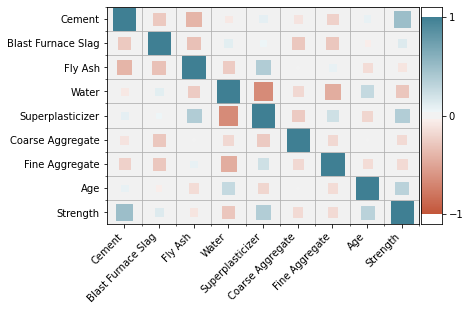

In [ ]:
corr = df.corr()
corrplot(corr, size_scale=500,marker='s')

Seems all the predictors have good association!!

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
import keras
from keras.layers import Dense

[link text](https://)Let's build the model😉😉😉

In [ ]:
def regression_model():
  inputs = keras.Input(shape=(8,))
  dense1 = Dense(10, activation="relu", name="layer-1", input_shape=(8,))
  X = dense1(inputs)
  outputs = Dense(1, activation="linear", name="output")(X)
  model = keras.Model(inputs=inputs, outputs=outputs, name="regression_model")
  return model
regression_model().summary()

Model: "regression_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_55 (InputLayer)        (None, 8)                 0         
_________________________________________________________________
layer-1 (Dense)              (None, 10)                90        
_________________________________________________________________
output (Dense)               (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = regression_model()
model.compile(
    optimizer="adam",
    loss="mse")

In [ ]:
# Let's check the model
model.fit(
    x=X_train,
    y=y_train,
    batch_size=16,
    epochs=5,
    callbacks=None,
)

Epoch 1/5
721/721 [==============================] - 0s 159us/step - loss: 2425.4305
Epoch 2/5
721/721 [==============================] - 0s 69us/step - loss: 1816.0863
Epoch 3/5
721/721 [==============================] - 0s 67us/step - loss: 1395.1374
Epoch 4/5
721/721 [==============================] - 0s 64us/step - loss: 1141.1964
Epoch 5/5
721/721 [==============================] - 0s 67us/step - loss: 963.5981


In [ ]:
l = model.evaluate(
    x=X_test,
    y=y_test,
    batch_size=10)

309/309 [==============================] - 0s 91us/step


In [ ]:
print(l)

778.9454048428335


Now running the model 50 times

In [ ]:
loss = []

for i in range(50):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10+i)
  model = regression_model()
  model.compile(optimizer="adam", loss="mse")
  model.fit(x=X_train, y=y_train, batch_size=32, epochs=50,verbose=0, callbacks=None)
  l = model.evaluate(x=X_test, y=y_test, batch_size=10, verbose=0)
  loss.append(l)
  print(f'Trial:', i, 'MSE:', l)


Trial: 0 MSE: 129.04271086905766
Trial: 1 MSE: 168.5399687436792
Trial: 2 MSE: 95.34265398439081
Trial: 3 MSE: 358.72627826184515
Trial: 4 MSE: 210.7195737277034
Trial: 5 MSE: 113.46875968488675
Trial: 6 MSE: 124.70103690385046
Trial: 7 MSE: 435.23302886864127
Trial: 8 MSE: 307.28235105249104
Trial: 9 MSE: 134.25705249872794
Trial: 10 MSE: 101.34844175665896
Trial: 11 MSE: 389.9431865408197
Trial: 12 MSE: 76.52683010533404
Trial: 13 MSE: 338.3998018530194
Trial: 14 MSE: 113.02551667049865
Trial: 15 MSE: 115.35650096510606
Trial: 16 MSE: 422.67482448935897
Trial: 17 MSE: 600.7985474422911
Trial: 18 MSE: 302.2269137484356
Trial: 19 MSE: 146.45622221320193
Trial: 20 MSE: 419.67838275008216
Trial: 21 MSE: 365.9826800398842
Trial: 22 MSE: 109.54712323926414
Trial: 23 MSE: 601.5253182321691
Trial: 24 MSE: 87.63253091608436
Trial: 25 MSE: 598.774015457499
Trial: 26 MSE: 328.71214274681114
Trial: 27 MSE: 131.56956468353766
Trial: 28 MSE: 263.6166373934946
Trial: 29 MSE: 155.2438254248363
Trial

In [ ]:
loss = np.array(loss)

In [ ]:
print(f'Average mse:',np.average(loss))
print(f'Standard deviation:',np.std(loss))

Average mse: 306.1712195477285
Standard deviation: 302.66803747859205


The model performs with an average MSE of 306.1712195 & standard deiviation of MSE is 302.66803. This is poor. 😢😢😢

